<h1><center> Домашняя работа #1</center></h1>

Задача:

- реализовать один из алгоритмов RL (рекомендуем Q-learning, a.k.a. SARSAMAX);
- реализовать логику обучения агента используя среду из Gymnasium;
- решить задачу Taxi-v3; -
- сделать небольшой отчет об обучении агента (графики награды)

Примечания:

- расчитывайте суммарную награду и среднюю награду за последние 100 эпизодов;
- результат должен содержать исходный код агента, сохраненного агента, графики награды в процессе обучения агента.

Описание задачи на сайте Gymnasium ([ссылка](https://gymnasium.farama.org/environments/toy_text/taxi/))

## Imports

In [11]:
import gymnasium as gym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [9]:
%load_ext autoreload
%autoreload 2 

from model_free_agorithms import train_with_q_learning

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Environment

**Initial state:**

Calculated as ((taxi_row * 5 + taxi_col) * 5 + passenger_location) * 4 + destination

- taxi_row, taxi_col: coordinates of your taxi (0-4)
- passenger_location:
  · 0: at R(ed)
  · 1: at G(reen)
  · 2: at Y(ellow)
  · 3: at B(lue)
  · 4: in taxi
- destination:
  · 0: R(ed)
  · 1: G(reen)
  · 2: Y(ellow)
  · 3: B(lue)

**Actions:**

- 0: Move south (down)
- 1: Move north (up)
- 2: Move east (right)
- 3: Move west (left)
- 4: Pickup passenger
- 5: Drop off passenger

**Rewards:**

- -1 per step unless other reward is triggered.
- +20 delivering passenger.
- -10 executing “pickup” and “drop-off” actions illegally.

Source: [link](https://gymnasium.farama.org/environments/toy_text/taxi/)

In [3]:
env = gym.make(
    "Taxi-v3",
    is_rainy=False,
    fickle_passenger=False,
    max_episode_steps=1_000,
    # render_mode="human"  # Раскомментируйте, чтобы увидеть игру
)

In [4]:
initial_state, info = env.reset()

In [5]:
taxi_row, taxi_col, passenger_loc, destination = env.unwrapped.decode(initial_state)

print(
    f"""
    {initial_state=}
    {taxi_row=}
    {taxi_col=}
    {passenger_loc=}
    {destination=}
"""
)


    initial_state=204
    taxi_row=2
    taxi_col=0
    passenger_loc=1
    destination=0



## Model

Q-leaning 

$$\begin{align*}
Q(s, a) &\leftarrow Q(s, a) + \alpha \delta \\
\text{where } \delta &= R(s, a) + \gamma \max_{a'} Q(s', a') - Q(s, a) \\
\\
\text{and } & s \text{ - current state} \\
& a \text{ - current action} \\
& s' \text{ - next state} \\
& \alpha \text{ - learning rate } (0 \leq \alpha \leq 1) \\
& \gamma \text{ - discount factor } (0 \leq \gamma \leq 1) \\
& R(s, a) \text{ - immediate reward}
\end{align*}$$

In [7]:
# Основные параметры
alpha = 0.1  # learning_rate
gamma = 0.6  # discount_factor
epsilon = 0.1  # probability of random action

n_epochs = 100_000

In [10]:
q_table, rewards = train_with_q_learning(
    env=env,
    alpha=alpha,
    gamma=gamma,
    epsilon=epsilon,
    exploratory_period=2_000,
    n_epochs=n_epochs,
    print_every=5_000,
)

  0%|                                                                               | 8/100000 [00:00<50:52, 32.76it/s]

episode=0 reward -4096,  # penalties 344, # steps 1000


  5%|███▉                                                                      | 5244/100000 [01:04<00:44, 2120.19it/s]

episode=5000 reward 6,  # penalties 0, # steps 15


 10%|███████▌                                                                 | 10379/100000 [01:07<00:40, 2239.18it/s]

episode=10000 reward 10,  # penalties 0, # steps 11


 15%|███████████▏                                                             | 15252/100000 [01:09<00:36, 2292.84it/s]

episode=15000 reward 2,  # penalties 0, # steps 19


 20%|██████████████▉                                                          | 20445/100000 [01:12<00:40, 1980.01it/s]

episode=20000 reward 6,  # penalties 0, # steps 15


 25%|██████████████████▌                                                      | 25386/100000 [01:15<00:42, 1741.91it/s]

episode=25000 reward -1,  # penalties 1, # steps 13


 30%|██████████████████████                                                   | 30241/100000 [01:18<00:40, 1718.60it/s]

episode=30000 reward -6,  # penalties 1, # steps 18


 35%|█████████████████████████▋                                               | 35228/100000 [01:20<00:33, 1937.29it/s]

episode=35000 reward 7,  # penalties 0, # steps 14


 40%|█████████████████████████████▍                                           | 40293/100000 [01:23<00:36, 1641.69it/s]

episode=40000 reward -8,  # penalties 1, # steps 20


 45%|█████████████████████████████████                                        | 45359/100000 [01:26<00:23, 2342.01it/s]

episode=45000 reward -5,  # penalties 1, # steps 17


 50%|████████████████████████████████████▊                                    | 50401/100000 [01:28<00:23, 2136.45it/s]

episode=50000 reward 6,  # penalties 0, # steps 15


 55%|████████████████████████████████████████▍                                | 55364/100000 [01:31<00:23, 1886.20it/s]

episode=55000 reward 9,  # penalties 0, # steps 12


 60%|███████████████████████████████████████████▉                             | 60259/100000 [01:33<00:18, 2203.98it/s]

episode=60000 reward 6,  # penalties 0, # steps 15


 65%|███████████████████████████████████████████████▌                         | 65225/100000 [01:36<00:18, 1862.84it/s]

episode=65000 reward 3,  # penalties 0, # steps 18


 70%|███████████████████████████████████████████████████▎                     | 70367/100000 [01:39<00:14, 2088.30it/s]

episode=70000 reward 12,  # penalties 0, # steps 9


 75%|██████████████████████████████████████████████████████▉                  | 75218/100000 [01:41<00:12, 1925.72it/s]

episode=75000 reward 6,  # penalties 0, # steps 15


 80%|██████████████████████████████████████████████████████████▌              | 80247/100000 [01:43<00:08, 2287.28it/s]

episode=80000 reward 5,  # penalties 0, # steps 16


 85%|██████████████████████████████████████████████████████████████▎          | 85419/100000 [01:45<00:06, 2273.80it/s]

episode=85000 reward 7,  # penalties 0, # steps 14


 90%|█████████████████████████████████████████████████████████████████▉       | 90262/100000 [01:48<00:04, 2096.43it/s]

episode=90000 reward 4,  # penalties 0, # steps 17


 95%|█████████████████████████████████████████████████████████████████████▌   | 95268/100000 [01:50<00:02, 2067.52it/s]

episode=95000 reward 10,  # penalties 0, # steps 11


100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [01:52<00:00, 885.04it/s]


In [15]:
with open("hw_1_trained_agent.pkl", "wb") as f:
    pickle.dump(q_table, f)

## Training graphs

In [16]:
table = pd.DataFrame(rewards, columns=["reward", "penalty", "steps"])
table = table.iloc[2_000:, :]  # remove exploratory_period

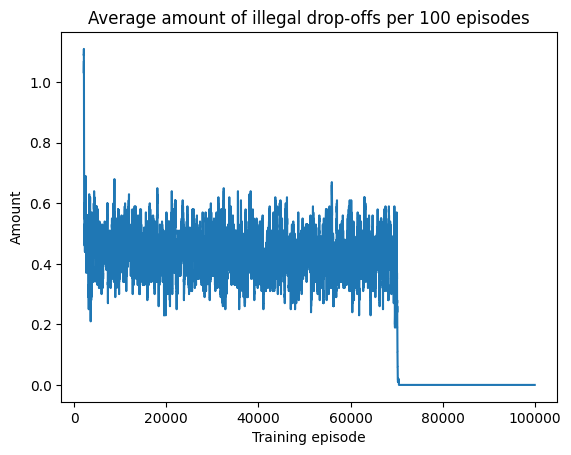

In [17]:
plt.plot(table.index, table["penalty"].rolling(100).mean())
plt.xlabel("Training episode")
plt.ylabel("Amount")
plt.title("Average amount of illegal drop-offs per 100 episodes")
plt.show()

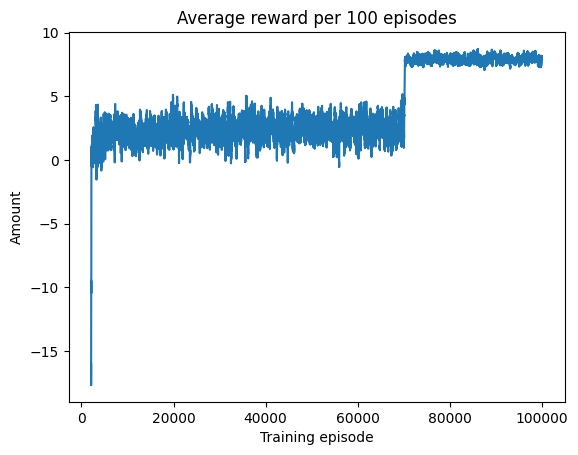

In [18]:
plt.plot(table.index, table["reward"].rolling(100).mean())
plt.xlabel("Training episode")
plt.ylabel("Amount")
plt.title("Average reward per 100 episodes")
plt.show()

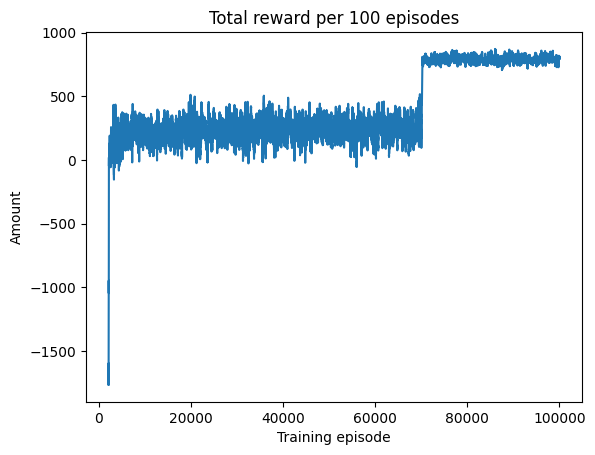

In [19]:
plt.plot(table.index, table["reward"].rolling(100).sum())
plt.xlabel("Training episode")
plt.ylabel("Amount")
plt.title("Total reward per 100 episodes")
plt.show()

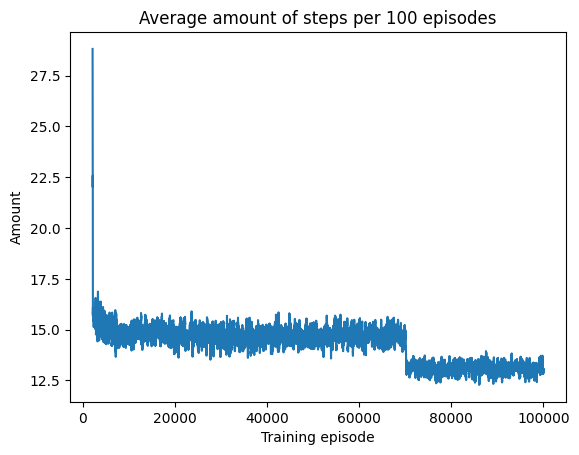

In [20]:
plt.plot(table.index, table["steps"].rolling(100).mean())
plt.xlabel("Training episode")
plt.ylabel("Amount")
plt.title("Average amount of steps per 100 episodes")
plt.show()

## Анимация

In [25]:
with open("hw_1_trained_agent.pkl", "rb") as f:
    q_table = pickle.load(f)

In [26]:
env = gym.make(
    "Taxi-v3",
    is_rainy=False,
    fickle_passenger=False,
    max_episode_steps=1_00,
    render_mode="human",  # Раскомментируйте, чтобы увидеть игру
)

In [27]:
# https://github.com/openai/gym/issues/741#issuecomment-778703878
done = False
score = 0
state, _ = env.reset()
example_steps = 10

while not done:
    env.render()  # Раскомментируйте, чтобы увидеть игру
    action = np.argmax(q_table[state, :])
    next_state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    state = next_state
    score += reward

env.close()

print(f"Score is: {score}")

Score is: 11
